# Prediction of back pain using Logistic Regression, Python

The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/ back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables. 

In [1]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [2]:
back_data = pd.read_csv("Dataset_spine.csv")

In [3]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

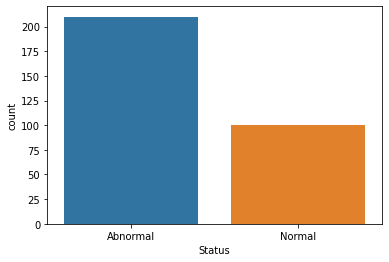

In [5]:
sns.countplot(x = 'Status', data = back_data)
plt.show()

In [6]:
## Understanding the structure of the data variables
back_data.info()

##Checking for missing values. There are no missing values
print(back_data.isnull().sum())
print(back_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB
pelvic_incidence

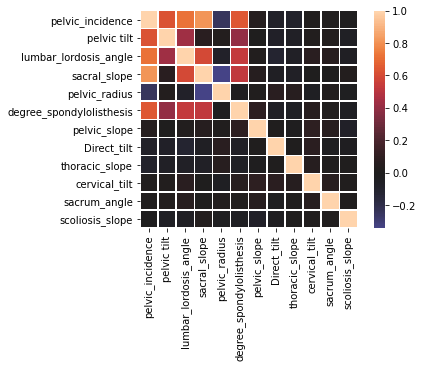

In [7]:
corr_back = back_data.corr()

# Generate the correlation plot 
sns.heatmap(corr_back, center=0, square=True, linewidths=.5)
plt.show()

In [8]:
# Seeing the correlation values
corr_back

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [9]:
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [10]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


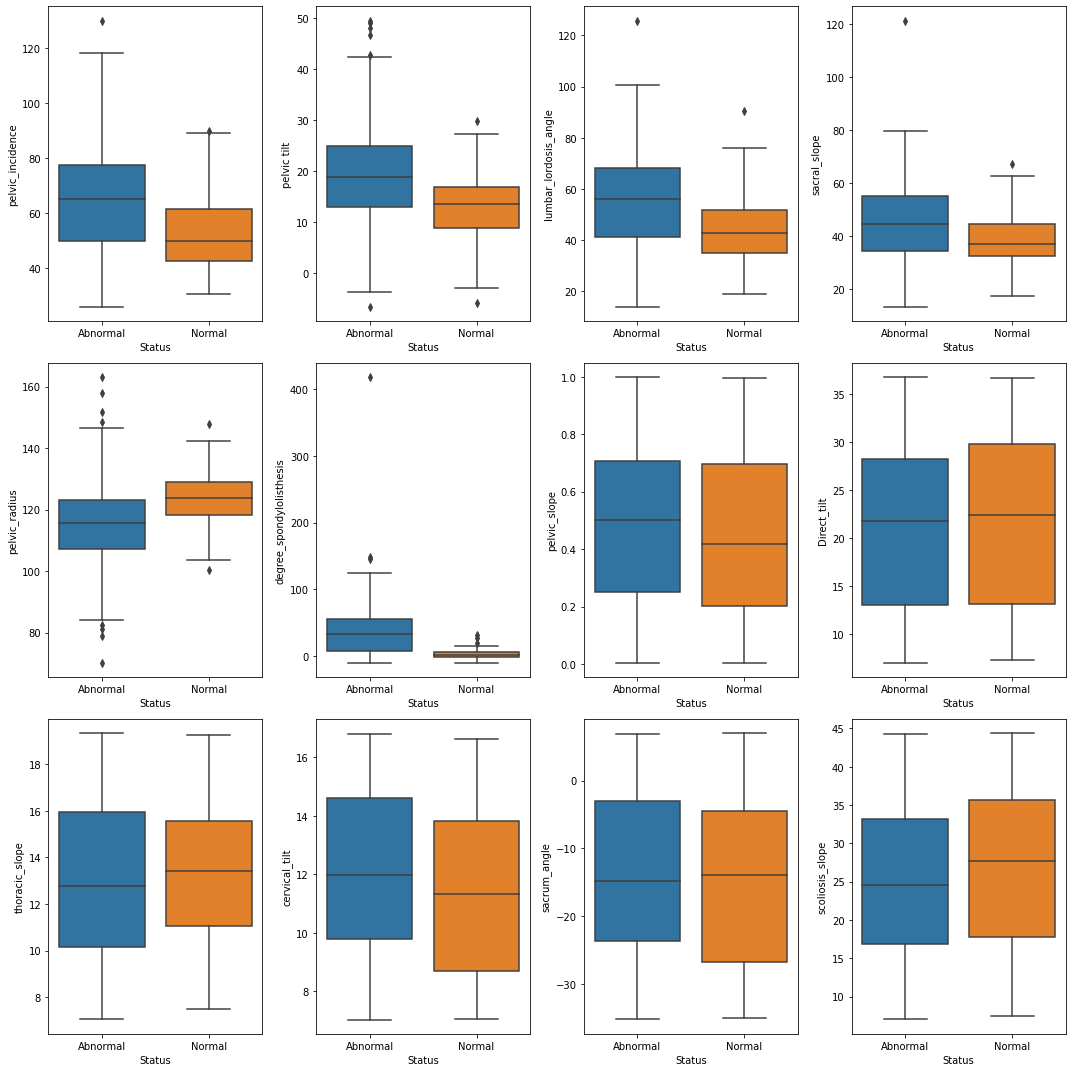

In [11]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.boxplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

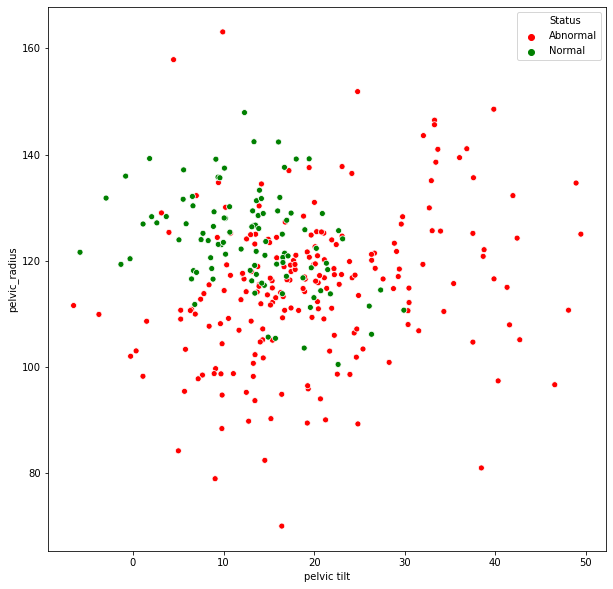

In [12]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic tilt", y="pelvic_radius", hue = "Status", data = back_data, palette =['red','green'])
plt.show()

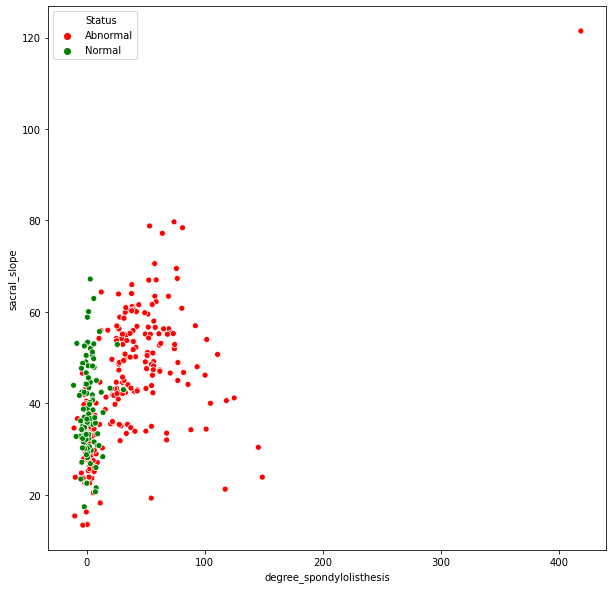

In [13]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="degree_spondylolisthesis", y="sacral_slope", hue = "Status", data = back_data, palette =['red','green'])
plt.show()

In [14]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

In [15]:
X = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

In [16]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    #from sklearn.preprocessing import StandardScaler
    #scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    #scaler.fit(X_train)

    # Now apply the transformations to the data:
    #train_scaled = scaler.transform(X_train)
    #test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(X_train, X_test, y_train, y_test)#X_train, X_test

In [17]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [18]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [19]:
logreg_result = logistic_regression(X_train_scaled, y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.871
Test set score: 0.796


In [21]:
# While the previous model implemented was good in predicting the Target variable on a test set, 
# we did not interpret anything about the individual features - which variable(s) influence the Target variable more.

logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.298731
         Iterations: 35
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.525     
Dependent Variable:     y                  AIC:                153.6491  
Date:                   2021-04-08 08:48   BIC:                194.2079  
No. Observations:       217                Log-Likelihood:     -64.825   
Df Model:               11                 LL-Null:            -136.45   
Df Residuals:           205                LLR p-value:        3.5513e-25
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
pelvic_incidence          12.8644      nan     nan    nan     nan     nan
pe

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


## Understanding the model result summary

 - The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular. 
 - In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
 - Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model. 

In [22]:
#Removing the highly correlated variables which also had high standard error
cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic_incidence']] #'pelvic tilt','sacral_slope'
X = back_data[cols_to_include]



In [49]:
#Removing the highly correlated variables which also had high standard error
cols_to_include1 = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic_incidence']] #'pelvic tilt','sacral_slope'
X = back_data[cols_to_include1]


In [31]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.871
Test set score: 0.839


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
cols_to_include

['pelvic tilt',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'pelvic_slope',
 'Direct_tilt',
 'thoracic_slope',
 'cervical_tilt',
 'sacrum_angle',
 'scoliosis_slope']

The test results indicate that the predictive power has gone down after removing the highly correlated variables. Let us look at the statistical summary below.

In [25]:
# to get the statistical summary of the new model
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306526
         Iterations 9
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.513     
Dependent Variable:    y                  AIC:                153.0323  
Date:                  2021-04-08 08:48   BIC:                186.8312  
No. Observations:      217                Log-Likelihood:     -66.516   
Df Model:              9                  LL-Null:            -136.45   
Df Residuals:          207                LLR p-value:        1.0991e-25
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        9.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
pelvic tilt               0.0963   0.0335  2.8780 0

In [27]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = back_data.loc[:,['pelvic_radius','degree_spondylolisthesis','sacral_slope','pelvic tilt','cervical_tilt']]

In [28]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.862
Test set score: 0.828


In [30]:
X_trim_1

,pelvic_radius,degree_spondylolisthesis,sacral_slope,pelvic tilt,cervical_tilt
0,98.672917,-0.254400,40.475232,22.552586,15.30468
1,114.405425,4.564259,28.995960,10.060991,16.78486
2,105.985135,-3.530317,46.613539,22.218482,16.65897
3,101.868495,11.211523,44.644130,24.652878,11.42447
4,108.168725,7.918501,40.060784,9.652075,8.87237
...,...,...,...,...,...
305,117.449062,-4.245395,34.286877,13.616688,8.51707
306,114.365845,-0.421010,33.215251,20.721496,7.08745
307,125.670725,-2.707880,38.751628,22.694968,8.89572
308,118.545842,0.214750,36.559635,8.693157,9.75922


In [29]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.311072
         Iterations 9
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.505     
Dependent Variable:    y                  AIC:                145.0051  
Date:                  2021-04-08 08:50   BIC:                161.9046  
No. Observations:      217                Log-Likelihood:     -67.503   
Df Model:              4                  LL-Null:            -136.45   
Df Residuals:          212                LLR p-value:        7.9708e-29
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        9.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
pelvic_radius            -0.0262   0.0097 -2.6970 0

In [32]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)


# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


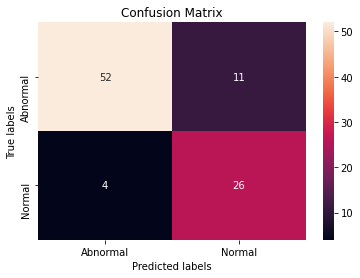

In [33]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

In [34]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Abnormal       0.70      0.87      0.78        30
      Normal       0.93      0.83      0.87        63

    accuracy                           0.84        93
   macro avg       0.82      0.85      0.83        93
weighted avg       0.86      0.84      0.84        93



In [28]:
# Scaling - Without scaling , Min max scaling
# Dont remove all three correlated columns just the two or the one that solves the problem

In [29]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0])

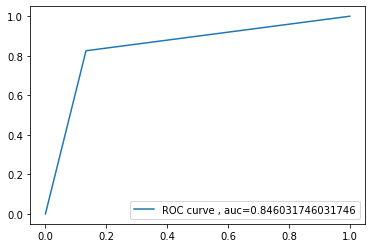

In [35]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

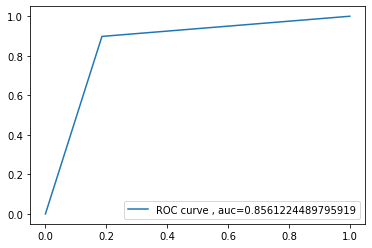

In [36]:
y_pred_train = logreg_result.predict(X_train_scaled)
fpr, tpr, threshholds = metrics.roc_curve(y_train,  y_pred_train)
auc = metrics.roc_auc_score(y_train,  y_pred_train)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0])

In [33]:
y_pred_train = logreg_result.predict_proba(X_train_scaled)

In [34]:
y_pred_train

array([[3.30211480e-02, 9.66978852e-01],
       [8.42577591e-01, 1.57422409e-01],
       [4.95254537e-01, 5.04745463e-01],
       [1.53174343e-03, 9.98468257e-01],
       [5.49558056e-01, 4.50441944e-01],
       [3.56549467e-02, 9.64345053e-01],
       [6.39239408e-01, 3.60760592e-01],
       [6.00660978e-01, 3.99339022e-01],
       [5.53917547e-01, 4.46082453e-01],
       [6.35357480e-01, 3.64642520e-01],
       [2.70911437e-01, 7.29088563e-01],
       [7.11996305e-02, 9.28800370e-01],
       [8.69251271e-04, 9.99130749e-01],
       [4.05733653e-03, 9.95942663e-01],
       [1.55867963e-02, 9.84413204e-01],
       [2.43712627e-01, 7.56287373e-01],
       [9.09209583e-01, 9.07904172e-02],
       [8.35999888e-03, 9.91640001e-01],
       [3.41920494e-01, 6.58079506e-01],
       [7.21584700e-01, 2.78415300e-01],
       [4.64551212e-01, 5.35448788e-01],
       [2.82142707e-01, 7.17857293e-01],
       [5.44233109e-01, 4.55766891e-01],
       [1.84544884e-02, 9.81545512e-01],
       [4.620713

In [ ]:
## ROC - With different threshholds 
## Scaling variants - Min max / No scale 